<a href="https://colab.research.google.com/github/C9342-mhmt/Assignment/blob/main/used_car_price_prediction_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [3]:
df  = pd.read_csv("/content/car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df["Car_Name"].value_counts()

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
UM Renegade Mojave     1
Hero Passion X pro     1
corolla                1
KTM 390 Duke           1
camry                  1
Name: Car_Name, Length: 98, dtype: int64

# Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.shape

(301, 9)

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
#df.describe().T

In [16]:
r = len(df.columns[1:])//2+ 1*(len(df.columns[1:])%2==1)
c = 2
r,c

(4, 2)

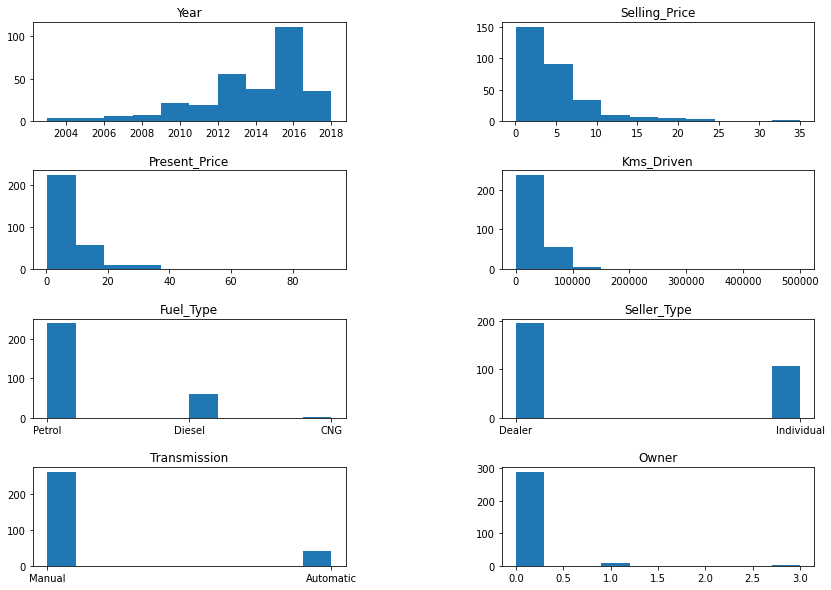

In [18]:
fig, ax = plt.subplots(nrows=r,ncols=c, figsize=(14,10))
fig.subplots_adjust(left=None,    bottom=None,    right=None,    top=None,    wspace=0.5,    hspace=0.5)

for i,col in enumerate(df.columns[1:]):
    ax[i//2,i%2].hist(df[col])
    ax[i//2,i%2].set_title(col)

In [ ]:
for i,col in enumerate(df.columns[1:]):
    plt.figure(i)
    sns.histplot(df[col])

In [20]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [21]:
plt.rcParams["figure.figsize"] = (9,5)

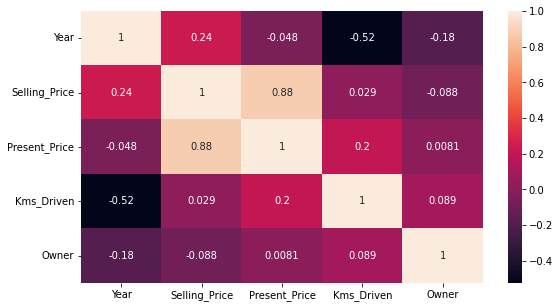

In [22]:
sns.heatmap(df.corr(), annot=True);

In [23]:
cols = list(df.iloc[:,1:].select_dtypes(include="object").columns)
# df.info()

In [ ]:
# df[(df.Selling_Price < df.Present_Price)].shape

In [24]:
df = pd.get_dummies(df,columns=["Fuel_Type","Seller_Type","Transmission"], drop_first=True)

In [25]:
df["car_age"] = 2018-df["Year"]

In [26]:
df.drop(["Car_Name","Year"],axis=1,inplace=True)

In [27]:
df.shape

(301, 9)

In [28]:
df.sample(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,car_age
192,0.20,0.75,49000,1,0,1,1,1,11
273,2.25,7.50,61203,0,0,1,0,1,8
237,11.25,13.60,68000,0,1,0,0,1,3
128,0.80,0.87,3000,0,0,1,1,1,1
247,5.95,9.40,36000,0,0,1,0,1,3
14,2.25,7.21,77427,0,0,1,0,1,9
143,0.60,0.84,25000,0,0,1,1,1,2
266,3.65,7.00,35000,0,0,1,0,1,4
83,12.50,13.46,38000,0,1,0,0,1,3
205,5.25,5.70,3493,1,0,1,0,1,2


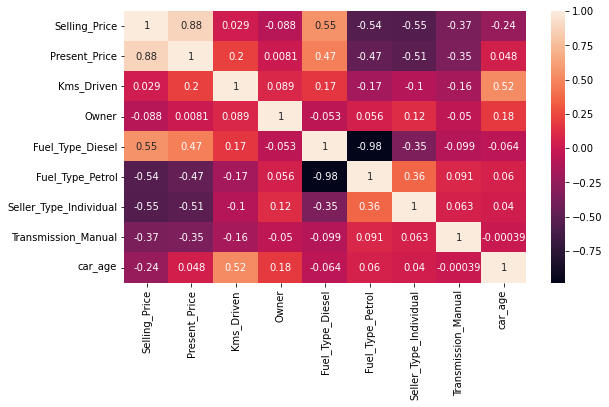

In [29]:
sns.heatmap(df.corr(), annot=True);

In [ ]:
# sns.pairplot(df);

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [30]:
X = df.drop(["Selling_Price"],axis=1)
y= df["Selling_Price"]


### Splitting data into training and testing

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=5)


In [33]:
# X_train,X_test,y_train,y_test
X_train.shape

(240, 8)

##  Model Building (Linear Regression)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
lr_model = LinearRegression() # 
lr_model.fit(X_train_scaled,y_train)

print("R2_train:", lr_model.score(X_train_scaled,y_train), "\nR2_test:", lr_model.score(X_test_scaled,y_test))

R2_train: 0.879844039130107 
R2_test: 0.8589039971923134


# Interpret the model

In [37]:
pd.DataFrame(lr_model.coef_,X_train.columns, columns=["Coefs_"])

,Coefs_
Present_Price,41.088405
Kms_Driven,-3.975180
Owner,-2.440733
Fuel_Type_Diesel,2.619246
Fuel_Type_Petrol,0.606487
Seller_Type_Individual,-1.220167
Transmission_Manual,-1.008683
car_age,-4.785716


In [ ]:
# for k,v in dict(zip(X_train.columns, lr_model.coef_)).items():
#     print(f"{k:<20}","\t",f"{v:.3f}")

# Model Evaluation

In [38]:
y_pred = lr_model.predict(X_test_scaled)

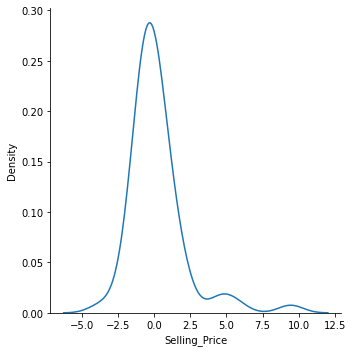

In [39]:
residuals = y_test-y_pred
sns.displot(residuals, kind="kde");

In [40]:
f"{len(residuals[residuals>0])} low + {len(residuals[residuals<0])} high = {len(X_test)}"

'25 low + 36 high = 61'

In [41]:
# y_pred = lr_model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,"residuals":residuals})
results.sort_values(by="residuals",ascending=False)

,Actual,Predicted,residuals
196,0.17,-9.278703,9.448703
66,19.75,14.036673,5.713327
93,23.00,18.190466,4.809534
96,20.75,16.391041,4.358959
235,9.10,6.828228,2.271772
...,...,...,...
216,2.90,4.345653,-1.445653
67,9.25,10.707296,-1.457296
98,7.05,9.094299,-2.044299
60,6.95,9.187814,-2.237814


In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
def eval_model(y_test,y_pred):
    rmse=(mean_squared_error(y_test,y_pred)**.5)
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print(f"rmse:\t\t{rmse }")
    print(f"mae:\t\t{mae }")
    print(f"R2_score:\t{R2_score }")
    return R2_score

In [44]:
eval_model(y_test,y_pred), "train R2: ",lr_model.score(X_train_scaled, y_train),"test R2: ",lr_model.score(X_test_scaled, y_test)

rmse:		1.9460540138874827
mae:		1.181176915707682
R2_score:	0.8589039971923134


(0.8589039971923134,
 'train R2: ',
 0.879844039130107,
 'test R2: ',
 0.8589039971923134)

In [45]:
# plt.scatter([10,20,30],[1,2,3])

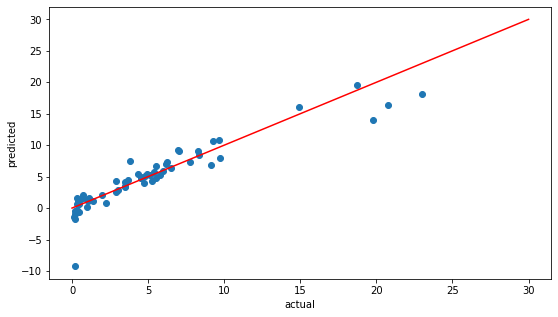

In [46]:
plt.scatter(y_test,y_pred,)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.plot([0,30],[0,30],"r");

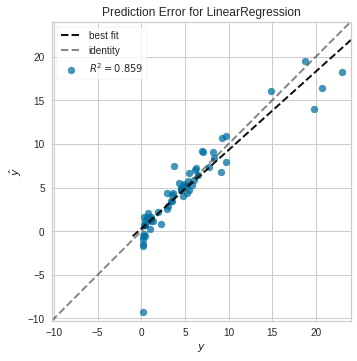

In [47]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lr_model= LinearRegression()
visualizer = PredictionError(lr_model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show() 

# Regularization

# Ridge

In [48]:
from sklearn.linear_model import Ridge, RidgeCV

In [49]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled,y_train)

Ridge()

In [50]:
ridge_model.score(X_train_scaled,y_train),ridge_model.score(X_test_scaled,y_test)

(0.8116775055678218, 0.8651263662232391)

In [51]:
y_pred = ridge_model.predict(X_test_scaled)

In [52]:
eval_model(y_test,y_pred)

rmse:		1.9026594573849422
mae:		1.1854250171898175
R2_score:	0.8651263662232391


0.8651263662232391

In [53]:
ridge_model.alpha

1.0

In [54]:
ridgecv_model = RidgeCV(alphas=np.linspace(0.2, 10, 100),cv=10 ,scoring='neg_root_mean_squared_error')

ridgecv_model.fit(X_train_scaled,y_train)
y_pred = ridgecv_model.predict(X_test_scaled)
eval_model(y_test,y_pred), "alpha:", ridgecv_model.alpha_, "best score:", ridgecv_model.best_score_

rmse:		1.821634362598607
mae:		1.1385815300516207
R2_score:	0.876369009068347


(0.876369009068347, 'alpha:', 0.2, 'best score:', -1.8921625513908746)

In [55]:
ridgecv_model = RidgeCV(alphas=np.linspace(0.01, 2, 100),cv=10,scoring='neg_root_mean_squared_error')

ridgecv_model.fit(X_train_scaled,y_train)
y_pred = ridgecv_model.predict(X_test_scaled)
eval_model(y_test,y_pred),"alpha:", ridgecv_model.alpha_, "best score:", ridgecv_model.best_score_

rmse:		1.8183586361179322
mae:		1.1382733931591085
R2_score:	0.8768132444136737


(0.8768132444136737,
 'alpha:',
 0.21101010101010104,
 'best score:',
 -1.8921050167455422)

In [56]:
y_train_pred = ridgecv_model.predict(X_train_scaled)
eval_model(y_train,y_train_pred)

rmse:		1.8009709237880644
mae:		1.1917806843577627
R2_score:	0.8724760334722157


0.8724760334722157

In [57]:
ridge_model = Ridge(alpha=ridgecv_model.alpha_)
ridge_model.fit(X_train_scaled,y_train)
y_pred = ridge_model.predict(X_test_scaled)
eval_model(y_test,y_pred)

rmse:		1.8183586361179322
mae:		1.1382733931591085
R2_score:	0.8768132444136737


0.8768132444136737

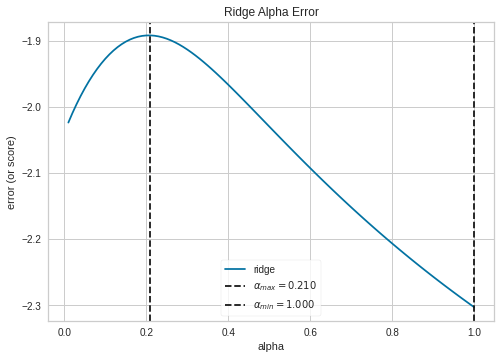

In [58]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
# alpha_space = np.linspace(0.01, 1, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=np.linspace(0.01, 1, 100),
    cv=10,
    scoring='neg_root_mean_squared_error'
)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

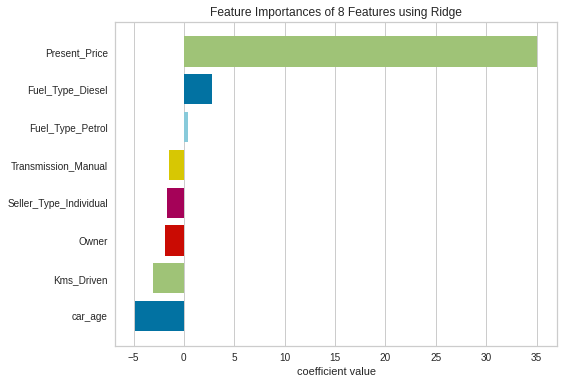

In [59]:
from yellowbrick.model_selection import FeatureImportances

model = Ridge(alpha=ridgecv_model.alpha_)
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

# Lasso

In [60]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [61]:
lasso_model = Lasso().fit(X_train_scaled,y_train)
y_pred = lasso_model.predict(X_test_scaled)
eval_model(y_test,y_pred), lasso_model.score(X_train_scaled,y_train), lasso_model.score(X_test_scaled,y_test)

rmse:		4.844430603529284
mae:		3.198316612453815
R2_score:	0.12563974476813833


(0.12563974476813833, 0.12177374673996344, 0.12563974476813833)

In [62]:
lasso_model.alpha

1.0

In [63]:
lassocv_model =LassoCV(alphas=np.linspace(0.01,10,100),cv=10).fit(X_train ,y_train)
y_pred = lassocv_model.predict(X_test)

print(eval_model(y_test,y_pred), 
      "\n\nR2_train:",lassocv_model.score(X_train, y_train), 
      "R2_test:",lassocv_model.score(X_test, y_test) ,"alpha:", lassocv_model.alpha_)

rmse:		1.9581213547354634
mae:		1.1722989823754513
R2_score:	0.8571487195257618
0.8571487195257618 

R2_train: 0.8795593789103365 R2_test: 0.8571487195257618 alpha: 0.01


In [64]:
lassocv_model =LassoCV(alphas=np.linspace(0.0001,.5,100),cv=10).fit(X_train_scaled ,y_train)
y_pred = lassocv_model.predict(X_test_scaled)

print(eval_model(y_test,y_pred), 
      "\n\nR2_train:",lassocv_model.score(X_train_scaled, y_train), 
      "R2_test:",lassocv_model.score(X_test_scaled, y_test) 
      ,"alpha:", lassocv_model.alpha_)

rmse:		1.7161552536110953
mae:		1.0969100660781985
R2_score:	0.8902718446130409
0.8902718446130409 

R2_train: 0.8657527360930499 R2_test: 0.8902718446130409 alpha: 0.03544646464646465


In [65]:
lasso_model = Lasso(alpha= lassocv_model.alpha_).fit(X_train_scaled,y_train)
y_pred = lasso_model.predict(X_test_scaled)

print(eval_model(y_test,y_pred), 
      "\n\nR2_train:",lasso_model.score(X_train_scaled, y_train), 
      "R2_test:",lasso_model.score(X_test_scaled, y_test) ,
      "alpha:", lasso_model.alpha)


rmse:		1.7161552536110953
mae:		1.0969100660781985
R2_score:	0.8902718446130409
0.8902718446130409 

R2_train: 0.8657527360930499 R2_test: 0.8902718446130409 alpha: 0.03544646464646465


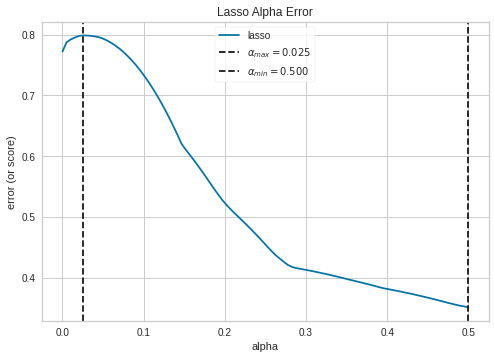

In [66]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
# alpha_space = np.linspace(0.01, 1, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Lasso(),
    alphas=np.linspace(0.0001,.5,100),
    cv=10
)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

## Elastic-Net 

In [67]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [68]:
el_model = ElasticNet().fit(X_train_scaled,y_train)
y_pred = el_model.predict(X_test_scaled)
eval_model(y_test,y_pred)

rmse:		4.658279048563928
mae:		3.054714362337027
R2_score:	0.1915448500897866


0.1915448500897866

In [69]:
el_model.score(X_train_scaled,y_train),el_model.score(X_test_scaled,y_test)

(0.18365441423272466, 0.1915448500897866)

In [70]:
el_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [71]:
elcv_model = ElasticNetCV(alphas = np.linspace(.001,1,100), l1_ratio = [.1, .5, .7, .9, .95, .99, 1]).fit(X_train_scaled,y_train)

y_pred = elcv_model.predict(X_test_scaled)

elcv_model.score(X_train_scaled,y_train),elcv_model.score(X_test_scaled,y_test)

(0.8721327803198207, 0.8771006486172738)

In [72]:
dir(elcv_model)
# elcv_model

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_estimator',
 '_get_param_names',
 '_get_tags',
 '_is_multitask',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'alpha_',
 'alphas',
 'alphas_',
 'coef_',
 'copy_X',
 'cv',
 'dual_gap_',
 'eps',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'l1_ratio',
 'l1_ratio_',
 'max_iter',
 'mse_path_',
 'n_alphas',
 'n_features_in_',
 'n_iter_',
 'n_jobs',


In [73]:
elcv_model.alpha_, elcv_model.l1_ratio_

(0.001, 0.1)

In [74]:
eval_model(y_pred, y_test)

rmse:		1.8162362119656819
mae:		1.1377050614124302
R2_score:	0.8529124364845209


0.8529124364845209

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
model = ElasticNet()
params = {"alpha":np.linspace(.001,1,100), "l1_ratio":[.1, .5, .7, .9, .95, .99, 1]}
gr_model = GridSearchCV(model, params)
gr_model.fit(X_train_scaled, y_train)


GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.273...
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]),
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]})

In [77]:
y_pred = gr_model.predict(X_test_scaled)
eval_model(y_test,y_pred), "best score:", gr_model.best_score_, "best params:", gr_model.best_params_

rmse:		1.7683881543029507
mae:		1.1036448287724403
R2_score:	0.8834908257310398


(0.8834908257310398,
 'best score:',
 0.8463784721504377,
 'best params:',
 {'alpha': 0.011090909090909092, 'l1_ratio': 0.95})

In [78]:
y_train_pred = gr_model.predict(X_train_scaled)
eval_model(y_train,y_train_pred)

rmse:		1.8048694421508817
mae:		1.188178346454796
R2_score:	0.8719233398025459


0.8719233398025459